In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import joblib

In [2]:
df = pd.read_csv(r"C:\Users\Никита\Downloads\TUANDROMD.csv")
df

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4460,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Проверка и очистка данных от NaN значений
if df.isnull().values.any():
    print("NaN values found! Cleaning the data.")
    df = df.dropna()

# Проверка, что после очистки данных не осталось строк с NaN
assert not df.isnull().values.any(), "NaN values are still present in the data."

NaN values found! Cleaning the data.


In [4]:
# Предобработка данных (удаление или импутация пропущенных значений)
imputer = SimpleImputer(strategy='mean') # Или другой подход к импутации
df.iloc[:, :-1] = imputer.fit_transform(df.iloc[:, :-1])

X = df.drop('Label', axis=1).values
y = df['Label'].values

# Разделение набора на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация признаков
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Инициализация и обучение модели логистической регрессии
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
joblib.dump(lr_model, 'lr_model.joblib')

# Инициализация и обучение модели градиентного бустинга
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
joblib.dump(gb_model, 'gb_model.joblib')

# Инициализация и обучение модели k-ближайших соседей
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
joblib.dump(knn_model, 'knn_model.joblib')

# Оценка эффективности каждой модели
for model in (lr_model, gb_model, knn_model):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model.__class__.__name__} accuracy: {accuracy:.2f}')

C:\Users\843E~1\AppData\Local\Temp/ipykernel_4928/3210559532.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:, :-1] = imputer.fit_transform(df.iloc[:, :-1])


LogisticRegression accuracy: 0.98
GradientBoostingClassifier accuracy: 0.99
KNeighborsClassifier accuracy: 0.98


In [5]:
import shap
import json

feature_names = df.drop('Label', axis=1).keys()

# Создание словаря
param_dict = {param: 1 for param in feature_names}
json_data = json.dumps({'features': param_dict})

print(json_data)

{"features": {"ACCESS_ALL_DOWNLOADS": 1, "ACCESS_CACHE_FILESYSTEM": 1, "ACCESS_CHECKIN_PROPERTIES": 1, "ACCESS_COARSE_LOCATION": 1, "ACCESS_COARSE_UPDATES": 1, "ACCESS_FINE_LOCATION": 1, "ACCESS_LOCATION_EXTRA_COMMANDS": 1, "ACCESS_MOCK_LOCATION": 1, "ACCESS_MTK_MMHW": 1, "ACCESS_NETWORK_STATE": 1, "ACCESS_PROVIDER": 1, "ACCESS_SERVICE": 1, "ACCESS_SHARED_DATA": 1, "ACCESS_SUPERUSER": 1, "ACCESS_SURFACE_FLINGER": 1, "ACCESS_WIFI_STATE": 1, "activityCalled": 1, "ACTIVITY_RECOGNITION": 1, "ACCOUNT_MANAGER": 1, "ADD_VOICEMAIL": 1, "ANT": 1, "ANT_ADMIN": 1, "AUTHENTICATE_ACCOUNTS": 1, "AUTORUN_MANAGER_LICENSE_MANAGER": 1, "AUTORUN_MANAGER_LICENSE_SERVICE(.autorun)": 1, "BATTERY_STATS": 1, "BILLING": 1, "BIND_ACCESSIBILITY_SERVICE": 1, "BIND_APPWIDGET": 1, "BIND_CARRIER_MESSAGING_SERVICE": 1, "BIND_DEVICE_ADMIN": 1, "BIND_DREAM_SERVICE": 1, "BIND_GET_INSTALL_REFERRER_SERVICE": 1, "BIND_INPUT_METHOD": 1, "BIND_NFC_SERVICE": 1, "BIND_0TIFICATION_LISTENER_SERVICE": 1, "BIND_PRINT_SERVICE": 1, 

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


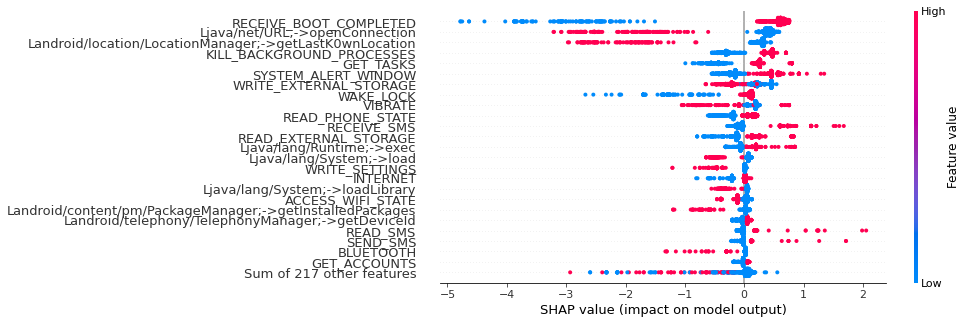

In [6]:
explainer = shap.Explainer(gb_model,feature_names=feature_names)
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values, plot_size=(10, 5),max_display=25)